# Machine Learning Process

* Acquire our data
* Explore and process our data - Understanding our dataset, see if there is any trend or correlation, if any visible outliers, visualise your dataset,...
* Data Cleaning - Dealing with missing values, any duplicates?
* Feature selection and selecting techniques
* Model Building
* Model Evaluation

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [17]:
cars = pd.read_csv('./Cognitive Classes/Machine Learning/Datasets/FuelConsumptionCo2.csv')

In [18]:
cars.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [19]:
cars.tail()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
1062,2014,VOLVO,XC60 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1063,2014,VOLVO,XC60 AWD,SUV - SMALL,3.2,6,AS6,X,13.2,9.5,11.5,25,264
1064,2014,VOLVO,XC70 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1065,2014,VOLVO,XC70 AWD,SUV - SMALL,3.2,6,AS6,X,12.9,9.3,11.3,25,260
1066,2014,VOLVO,XC90 AWD,SUV - STANDARD,3.2,6,AS6,X,14.9,10.2,12.8,22,294


In [20]:
cars['MODELYEAR'].describe()

count    1067.0
mean     2014.0
std         0.0
min      2014.0
25%      2014.0
50%      2014.0
75%      2014.0
max      2014.0
Name: MODELYEAR, dtype: float64

Text(0,0.5,'CO2 Emission')

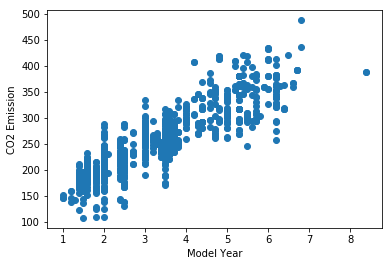

In [21]:
plt.scatter(cars.ENGINESIZE, cars.CO2EMISSIONS)
#plt.plot(cars.ENGINESIZE, cars.CO2EMISSIONS)
plt.xlabel('Model Year')
plt.ylabel('CO2 Emission')

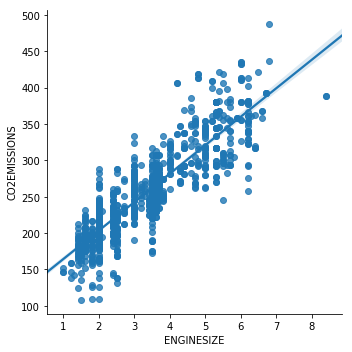

In [22]:
sns.lmplot('ENGINESIZE', 'CO2EMISSIONS', cars)

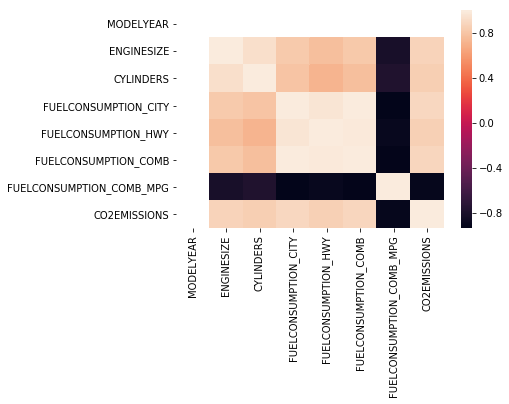

In [23]:
sns.heatmap(cars.corr())

# FEATURE SELECTION

In [24]:
X = cars[['ENGINESIZE', 'FUELCONSUMPTION_CITY', 'CYLINDERS']]
Y = cars[['CO2EMISSIONS']]

In [25]:
from sklearn.cross_validation import train_test_split

C:\Users\agunbiade\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# Train Test Split and Model Building

In [26]:
#training:70, testing:30 data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.3, random_state=7)
X_train.shape, Y_train.shape

((746, 3), (746, 1))

In [27]:
from sklearn.linear_model import LinearRegression

In [28]:
lm = LinearRegression(normalize=True)
lm.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

In [29]:
prediction = lm.predict(X_test)

#  EVALUATION

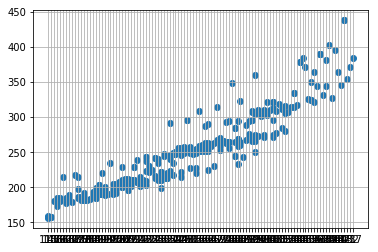

In [99]:
plt.figure()
#sns.regplot(x=Y_test, y=prediction)
plt.scatter(Y_test, prediction)
#plt.xticks([Y_test[0], Y_test[-1]])
plt.grid(True)

In [31]:
lm.coef_[0]

array([12.28354012,  8.01945952,  6.39066008])

In [32]:
lm.intercept_

array([71.02614569])

In [33]:
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

# Evaluation
# RMSE

In [34]:
from sklearn.metrics import mean_squared_error

In [47]:
RMSE = mean_squared_error(Y_test, prediction) ** 0.5
RMSE

20.346927289689166

In [49]:
X2 = cars[['ENGINESIZE','CYLINDERS', 'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB', 'FUELCONSUMPTION_COMB_MPG']]
Y2 = cars[['CO2EMISSIONS']]

In [50]:
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2, Y2, test_size=.3, random_state=7)

In [51]:
lm2 = LinearRegression()
lm2.fit(X2_train, Y2_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [52]:
prediction2 = lm2.predict(X2_test)

In [53]:
RMSE2 = mean_squared_error(Y2_test, prediction2) ** 0.5
RMSE

20.346927289689166

In [54]:
lm2.coef_

array([[ 9.13324465,  8.20470892,  6.44622397, -3.21831893, -3.9765422 ]])

In [64]:
cars[['CYLINDERS', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS']].corr()

,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
CYLINDERS,1.000000,0.776788,0.849685
FUELCONSUMPTION_COMB,0.776788,1.000000,0.892129
CO2EMISSIONS,0.849685,0.892129,1.000000


In [56]:
cars.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [75]:
data = {
    'percentage': ['7.5%', '6.7%', '4.4%'], 
    'month': ['36 month', '60 month', '56 month']
}
df = pd.DataFrame(data)
df

,month,percentage
0,36 month,7.5%
1,60 month,6.7%
2,56 month,4.4%


C:\Users\agunbiade\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:2: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0F400250>,
      dtype=object)

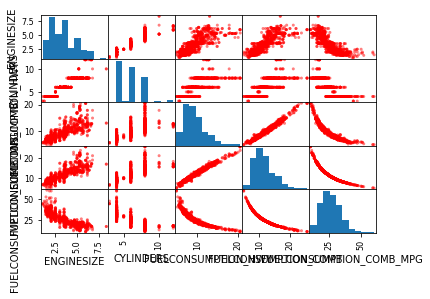

In [107]:
df = cars[['ENGINESIZE','CYLINDERS', 'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB', 'FUELCONSUMPTION_COMB_MPG']]
pd.scatter_matrix(df, diagonal='hist', color='red')

## We'll be getting a dataset from sklearn, The Boston House Dataset

In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston

%matplotlib inline

In [109]:
boston_dataset = load_boston()
boston_dataset.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR'])

In [110]:
boston_dataset.DESCR

"Boston House Prices dataset\n===========================\n\nNotes\n------\nData Set Characteristics:  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive\n    \n    :Median Value (attribute 14) is usually the target\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000\n

In [116]:
boston_dataset.data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [117]:
boston_dataset.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [120]:
boston_dataset.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [121]:
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [122]:
boston['MEDV'] = boston_dataset.target

In [124]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [126]:
boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [155]:
feature = boston[[ 'RM', 'LSTAT']]
target = boston[['MEDV']]

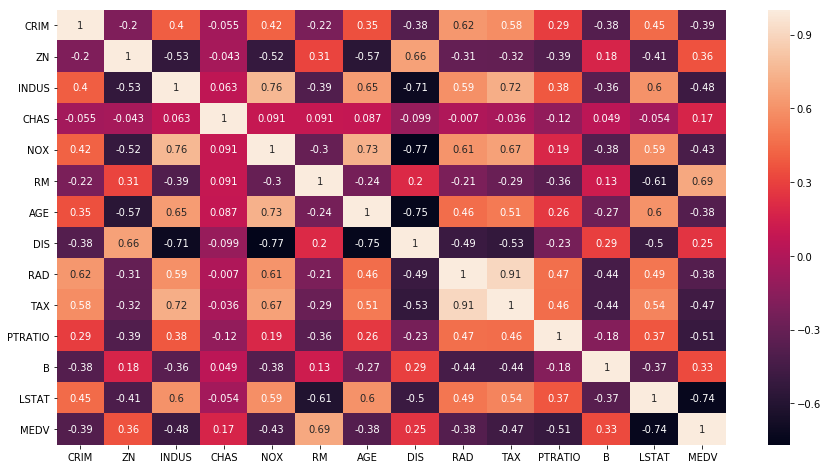

In [163]:
plt.figure(figsize=(15, 8))
correlation_matrix = boston.corr().round(3)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

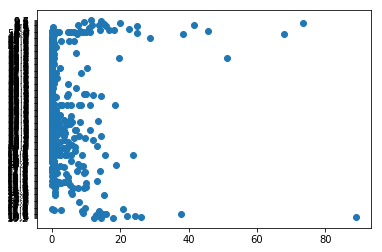

In [164]:
plt.scatter(boston.CRIM, target)

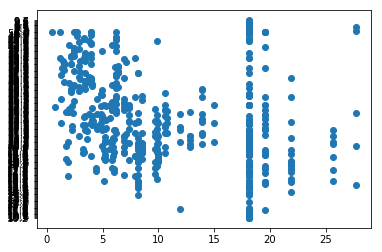

In [133]:
plt.scatter(feature.INDUS, target)

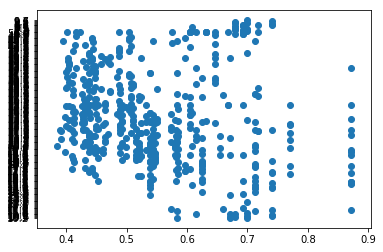

In [157]:
plt.scatter(boston.NOX, target)

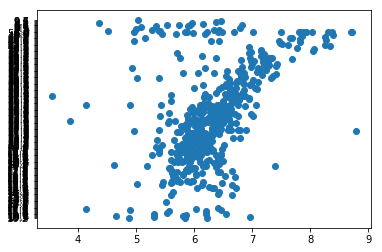

In [135]:
plt.scatter(feature.RM, target)

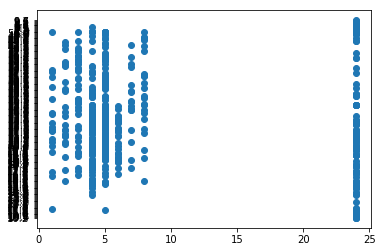

In [158]:
plt.scatter(boston.RAD, target)

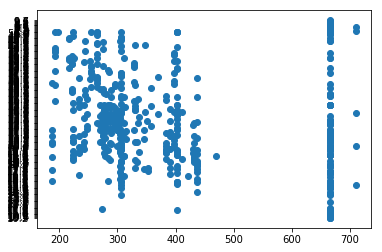

In [159]:
plt.scatter(boston.TAX, target)

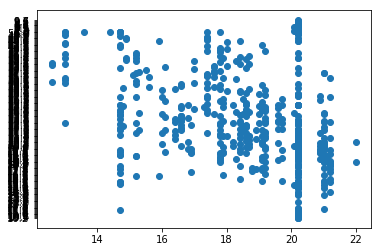

In [161]:
plt.scatter(boston.PTRATIO, target)

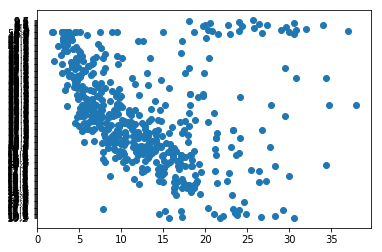

In [162]:
plt.scatter(boston.LSTAT, target)

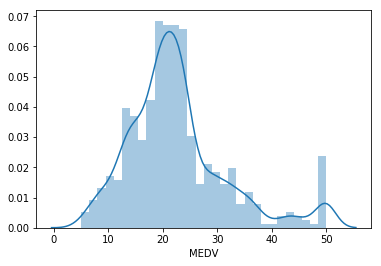

In [148]:
sns.distplot(boston['MEDV'], bins=30)

In [182]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split

In [226]:
X_train, X_test, Y_train, Y_test = train_test_split(feature, target, test_size=.2, random_state=5)

In [227]:
lin_reg = LinearRegression(normalize=True)

lin_reg.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

In [234]:
pred = lin_reg.predict(X_test)

In [233]:
np.sqrt(mean_squared_error(pred, Y_test))

5.137400784702911

In [230]:
lin_reg.coef_
lin_reg.intercept_

array([2.73624034])

In [231]:
mean_absolute_error(pred, Y_test)

3.7913102133431047

In [232]:
r2_score(Y_test, pred)

0.6628996975186953

# Model Equation: MEDV = 2.736 + RM * 4.589 + LSTAT * -0.717

In [235]:
-3.29215704 ** 2

-10.838297976021563